In [1]:
from probExplainer.model import BayesianNetwork
from probExplainer.utils import *
from probExplainer import algorithms
import pyAgrum as gum
import pandas as pd
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb


### Parameters of the experiments

In [2]:
ev_vars = {"F1": "intralaminar"}
target = ["F5"]

### Prepare experiments

In [3]:
N_EXPERTS = 42
bn_i = gum.loadBN("expert_networks/network_5.bif")
my_adapter = BayesianNetwork.BayesianNetworkPyAgrum(bn_i)
marginal_f5 = {i[0] : 0 for i in my_adapter.get_domain_of(["F5"])}
var_powerset = powerset([i for i in my_adapter.get_variables() if i not in target and i not in ev_vars.keys()])
var_powerset.pop(0)

()

In [4]:
def list_to_text(input_list) :
    to_ret = "{"
    for i in input_list :
        to_ret = to_ret + str(i)+", "
    to_ret = to_ret[:-2]
    to_ret = to_ret + "}"
    return to_ret

### Experiment 1
#### Count of relevant sets

In [5]:
relevance_count = {i : 0 for i in var_powerset}
for i in range(N_EXPERTS) :
    print("Expert: ",i+1)
    bn_i = gum.loadBN("expert_networks/network_"+str(i+1)+".bif")
    my_adapter = BayesianNetwork.BayesianNetworkPyAgrum(bn_i)
    map = my_adapter.maximum_a_posteriori(evidence=ev_vars, target=target)
    print(map)
    marginal_f5[map[0]["F5"]] = marginal_f5[map[0]["F5"]] + 1
    relevant_vars = algorithms.check_every_r_silja(my_adapter, ev_vars, target)[0]
    print("Relevant variables: ", relevant_vars)
    for j in relevance_count.keys() :
        for k in relevant_vars :
            if set(k).issubset(set(j)) :
                relevance_count[j] = relevance_count[j] + 1
                break
    print()

Expert:  1
({'F5': 'large_basket'}, 0.3040404160015684)
Relevant variables:  [('F2',), ('F4',), ('F3',)]

Expert:  2
({'F5': 'common_basket'}, 0.4926701574011258)
Relevant variables:  [('F2', 'F4')]

Expert:  3
({'F5': 'common_basket'}, 0.5169741636693747)
Relevant variables:  [('F4',), ('F3',)]

Expert:  4
({'F5': 'common_basket'}, 0.5881632730797198)
Relevant variables:  [('F2', 'F3'), ('F2', 'F4'), ('F3', 'F4')]

Expert:  5
({'F5': 'common_basket'}, 0.37973855872531553)
Relevant variables:  [('F4',), ('F3',)]

Expert:  6
({'F5': 'neurogliaform'}, 0.45460989881035885)
Relevant variables:  [('F4',), ('F2',)]

Expert:  7
({'F5': 'common_basket'}, 0.5474820047056389)
Relevant variables:  [('F4',), ('F2', 'F3')]

Expert:  8
({'F5': 'common_basket'}, 0.47627119756929714)
Relevant variables:  [('F3',), ('F4',)]

Expert:  9
({'F5': 'common_basket'}, 0.35992511232699137)
Relevant variables:  [('F4',), ('F3',)]

Expert:  10
({'F5': 'neurogliaform'}, 0.41677852495904716)
Relevant variables:  [

### Experiment 2
#### Computation of relevance strength

In [6]:
relevances = pd.DataFrame(columns=var_powerset, index=list(range(N_EXPERTS)), dtype=float)
for i in range(N_EXPERTS):
    print("Expert: ", i + 1)
    bn_i = gum.loadBN("expert_networks/network_" + str(i + 1) + ".bif")
    my_adapter = BayesianNetwork.BayesianNetworkPyAgrum(bn_i)
    map = my_adapter.maximum_a_posteriori(evidence=ev_vars, target=target)
    for j in var_powerset:
        print(j)
        strength_j = 1 - my_adapter.map_independence_strength(ev_vars=ev_vars, map=map[0], set_r=list(j))
        print("Relevance strength: ", strength_j)
        relevances.loc[i][j] = strength_j
    print()

Expert:  1
('F2',)
Relevance strength:  0.5523746584963016
('F3',)
Relevance strength:  0.6746083487043394
('F4',)
Relevance strength:  0.8803859204179127
('F2', 'F3')
Relevance strength:  0.5523746539517955
('F2', 'F4')
Relevance strength:  0.5523746596463793
('F3', 'F4')
Relevance strength:  0.7322258492867716
('F2', 'F3', 'F4')
Relevance strength:  0.5523746551018733

Expert:  2
('F2',)
Relevance strength:  0.0
('F3',)
Relevance strength:  0.0
('F4',)
Relevance strength:  0.0
('F2', 'F3')
Relevance strength:  1.1102230246251565e-16
('F2', 'F4')
Relevance strength:  0.11168398489477627
('F3', 'F4')
Relevance strength:  1.1102230246251565e-16
('F2', 'F3', 'F4')
Relevance strength:  0.10787145701468903

Expert:  3
('F2',)
Relevance strength:  0.0
('F3',)
Relevance strength:  0.14914337460167237
('F4',)
Relevance strength:  0.08603372077949445
('F2', 'F3')
Relevance strength:  0.14914337540740918
('F2', 'F4')
Relevance strength:  0.08603372133605869
('F3', 'F4')
Relevance strength:  0.2

Relevance strength:  0.6331629570752783
('F2', 'F3')
Relevance strength:  0.34706802271598036
('F2', 'F4')
Relevance strength:  0.6331629604036418
('F3', 'F4')
Relevance strength:  0.2529154093627405
('F2', 'F3', 'F4')
Relevance strength:  0.6542117189197283

Expert:  40
('F2',)
Relevance strength:  0.20584090091830443
('F3',)
Relevance strength:  0.3632677966059098
('F4',)
Relevance strength:  0.24128734301854404
('F2', 'F3')
Relevance strength:  0.4840142626822421
('F2', 'F4')
Relevance strength:  0.3693703064284505
('F3', 'F4')
Relevance strength:  0.2412873417440745
('F2', 'F3', 'F4')
Relevance strength:  0.36937030447983477

Expert:  41
('F2',)
Relevance strength:  0.0
('F3',)
Relevance strength:  0.6232153061479515
('F4',)
Relevance strength:  0.6241820618667222
('F2', 'F3')
Relevance strength:  0.6232153049514941
('F2', 'F4')
Relevance strength:  0.6241820607070356
('F3', 'F4')
Relevance strength:  0.43630425355680436
('F2', 'F3', 'F4')
Relevance strength:  0.4363042522430721

E

### Show raw results

In [7]:
print("F5 count: ", marginal_f5)
print()

print("EXPERIMENT 1 results")
print("Relevance count: ", relevance_count)
print()

print("EXPERIMENT 2 results")
print(relevances.describe())

F5 count:  {'arcade': 1, 'Cajal-Retzius': 0, 'chandelier': 0, 'common_basket': 18, 'common_type': 8, 'horse-tail': 0, 'large_basket': 2, 'Martinotti': 0, 'neurogliaform': 11, 'other': 2}

EXPERIMENT 1 results
Relevance count:  {('F2',): 22, ('F3',): 26, ('F4',): 37, ('F2', 'F3'): 38, ('F2', 'F4'): 42, ('F3', 'F4'): 40, ('F2', 'F3', 'F4'): 42}

EXPERIMENT 2 results
           (F2,)      (F3,)      (F4,)   (F2, F3)   (F2, F4)   (F3, F4)  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.206751   0.235980   0.214757   0.327857   0.329078   0.252992   
std     0.257937   0.250912   0.269589   0.216105   0.247581   0.208278   
min     0.000000   0.000000   0.000000   0.000000   0.003927   0.000000   
25%     0.000000   0.000000   0.004799   0.145583   0.104550   0.058548   
50%     0.154421   0.146770   0.105984   0.344569   0.275801   0.216169   
75%     0.353152   0.378306   0.277531   0.448282   0.558697   0.429909   
max     1.000000   0.719905   0.8

### Graphic results

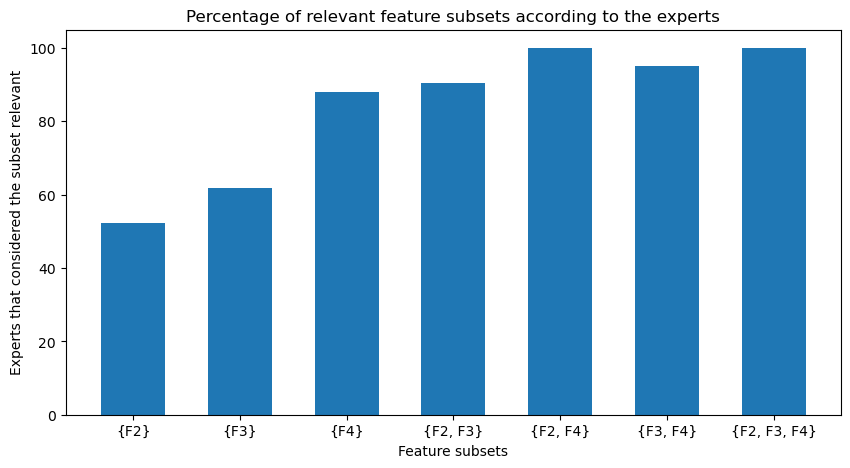

In [43]:
# Params
title = "Percentage of relevant feature subsets according to the experts"
ylabel = "Experts that considered the subset relevant"
xlabel = "Feature subsets"

subsets = [list_to_text(list(i)) for i in relevance_count.keys()]
count = [i/42 * 100 for i in relevance_count.values()]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(subsets, count,
        width = 0.6)
 
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

/tmp/ipykernel_6226/896036227.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


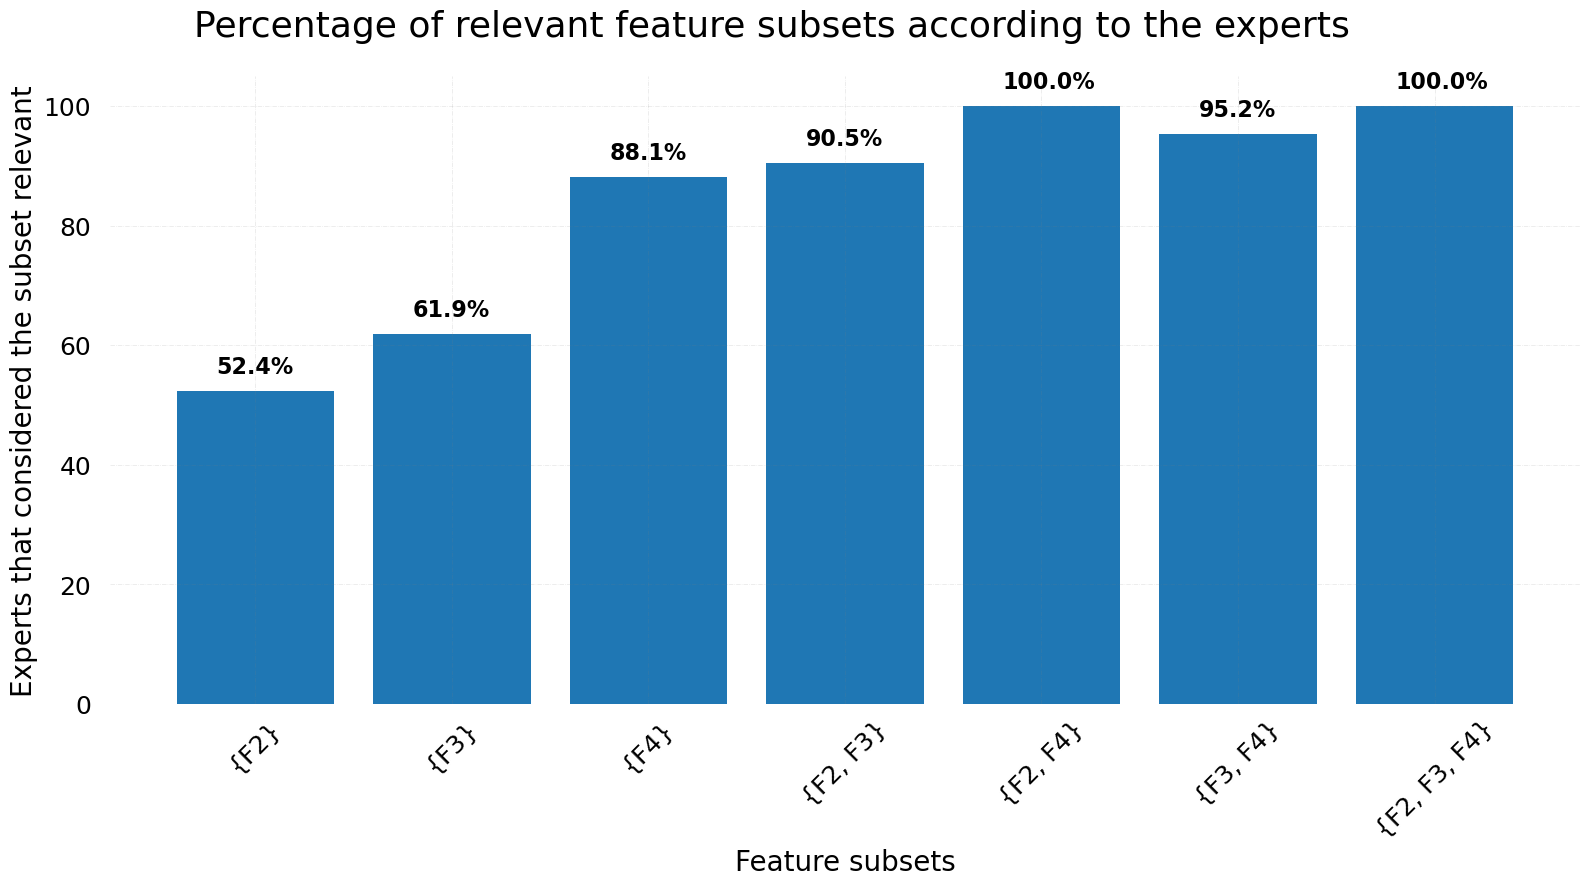

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.bar(subsets, count)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
#ax.invert_yaxis()
 
# Add annotation to bars
'''
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
'''
for i, v in enumerate(count):
    ax.text(i - 0.2, v + 3 , str(round((v), 1))+"%", fontweight='bold', fontsize = 16)
 
# Add Plot Title
ax.set_title(title, fontsize = 26, y=1.05, x=0.45)

ax.set_xlabel(xlabel,fontsize = 20)
ax.set_ylabel(ylabel, fontsize = 20)
 
# Add Text watermark
#fig.text(0.9, 0.15, 'Valero-Leal et al. (2023)', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)

plt.xticks(rotation=45, fontsize = 18)
plt.yticks(fontsize = 18)

 
# Show Plot
#plt.show()


plt.tight_layout()
plt.savefig("barplot.pdf")

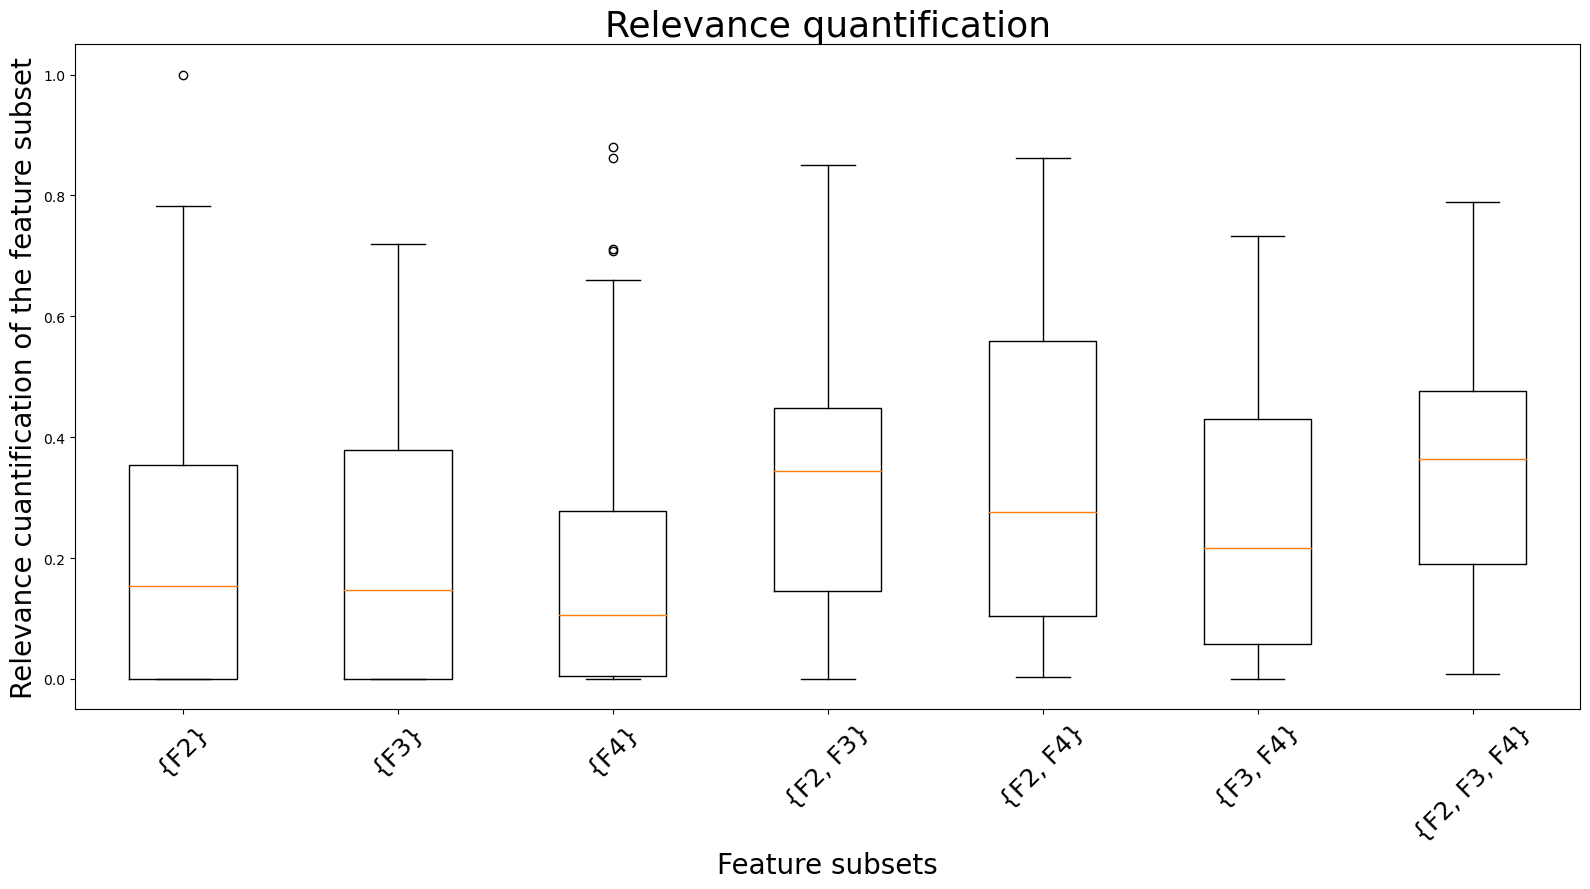

In [45]:
# Params
ylabel_alt = "Relevance cuantification of the feature subset"
title_alt = "Relevance quantification"

#fig = plt.figure(figsize =(10, 9))
fig, ax = plt.subplots(figsize =(16, 9))

# Creating plot
bp = ax.boxplot(relevances)

 
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
ax.set_title(title_alt, fontsize = 26)
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel(ylabel_alt, fontsize = 20)

ax.set_xticklabels(subsets,rotation = 45, fontsize = 18)
#plt.xticks(rotation=45)
 
#bp = ax.boxplot(relevances)
 
#show plot
#plt.show()
plt.tight_layout()

plt.savefig("boxplot.pdf")